# Carte de l'ensoleillement annuel moyen en France par départements 

L'objectif de ce document est à la fois de se familisariser avec les fonds de carte et la génération de cartes, et de visualiser une donnée qui peut être pertinente pour notre étude : la carte de l'ensoleillement moyen annuel par département en France. 

In [1]:
import pandas as pd
import geopandas as gpd

In [9]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 11.0 MB/s eta 0:00:0000:01
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-ewin_0h0
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-ewin_0h0
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2

In [74]:
url_soleil='https://static.data.gouv.fr/resources/donnees-du-temps-densoleillement-par-departements-en-france/20221207-142648/temps-densoleillement-par-an-par-departement-feuille-1.csv'
ensoleillement=pd.read_csv(url_soleil)
ensoleillement=ensoleillement.rename(columns={'Départements' : 'Départements',"Temps d'enseillement (jours/an)": "Temps d'ensoleillement (jours/an)"})
ensoleillement

,Départements,Temps d'ensoleillement (jours/an)
0,Ain,182
1,Aisne,142
2,Allier,161
3,Alpes de Haute Provence,241
4,Hautes-Alpes,232
...,...,...
88,Essonne,148
89,Hauts-de-Seine,107
90,Seine-Saint-Denis,126
91,Val-de-Marne,126


In [25]:
import cartiflette.s3 as s3

dep = s3.download_vectorfile_url_all(
    values = "metropole",
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="topojson",
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

dep["area"] = dep.to_crs(2154).area

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=DEPARTEMENT/crs=4326/FRANCE_ENTIERE=metropole/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 7.17MiB [00:00, 61.4MiB/s]


In [67]:
dep.sort_values('area', ascending = False)

,id,ID,NOM_M,NOM,INSEE_DEP,INSEE_REG,source,territoire,geometry,area
33,DEPARTEM_FXX_00000000034,NaN,GIRONDE,Gironde,33,75,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((-1.15275 45.60453, -1.15084 45...",1.036783e+10
40,DEPARTEM_FXX_00000000041,NaN,LANDES,Landes,40,75,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((-1.25361 44.46752, -1.25317 44.46762...",9.354177e+09
24,DEPARTEM_FXX_00000000025,NaN,DORDOGNE,Dordogne,24,75,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((-0.04044 45.10261, -0.04073 45.10309...",9.210826e+09
21,DEPARTEM_FXX_00000000022,NaN,COTE-D'OR,Côte-d'Or,21,27,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((4.11642 47.12327, 4.11597 47.1...",8.787770e+09
13,DEPARTEM_FXX_00000000014,NaN,AVEYRON,Aveyron,12,76,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.20786 44.61580, 2.20786 44.61590, ...",8.770144e+09
...,...,...,...,...,...,...,...,...,...,...
90,DEPARTEM_FXX_00000000091,NaN,TERRITOIRE DE BELFORT,Territoire de Belfort,90,27,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((6.82355 47.81328, 6.82385 47.81425, ...",6.101201e+08
94,DEPARTEM_FXX_00000000095,NaN,VAL-DE-MARNE,Val-de-Marne,94,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.33195 48.81702, 2.33209 48.81702, ...",2.448138e+08
93,DEPARTEM_FXX_00000000094,NaN,SEINE-SAINT-DENIS,Seine-Saint-Denis,93,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.55350 49.01018, 2.55350 49.01009, ...",2.368666e+08
92,DEPARTEM_FXX_00000000093,NaN,HAUTS-DE-SEINE,Hauts-de-Seine,92,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.29093 48.95097, 2.29152 48.95077, ...",1.755648e+08


In [64]:
soleil=dep.merge(ensoleillement, left_on='INSEE_DEP', right_on='Départements')[['NOM','geometry', 'area' ]]
soleil

,NOM,geometry,area
0,Ain,"POLYGON ((5.00939 46.50701, 5.00924 46.50701, ...",5.774291e+09
1,Aisne,"POLYGON ((3.07070 49.76692, 3.07055 49.76692, ...",7.418552e+09
2,Allier,"POLYGON ((2.56379 46.53199, 2.56379 46.53189, ...",7.365673e+09
3,Hautes-Alpes,"POLYGON ((6.26063 45.12680, 6.26284 45.12651, ...",5.684990e+09
4,Alpes-Maritimes,"MULTIPOLYGON (((7.05128 43.49938, 7.05128 43.4...",4.294694e+09
...,...,...,...
83,Essonne,"POLYGON ((2.22904 48.77049, 2.22918 48.77049, ...",1.818530e+09
84,Hauts-de-Seine,"POLYGON ((2.29093 48.95097, 2.29152 48.95077, ...",1.755648e+08
85,Seine-Saint-Denis,"POLYGON ((2.55350 49.01018, 2.55350 49.01009, ...",2.368666e+08
86,Val-de-Marne,"POLYGON ((2.33195 48.81702, 2.33209 48.81702, ...",2.448138e+08


/tmp/ipykernel_299/2651836168.py:1: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ax = soleil.plot(column = "area", color = 'orange')


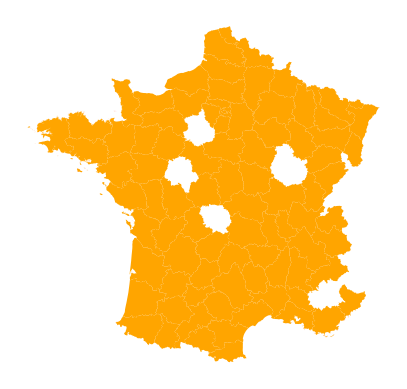

In [65]:
ax = soleil.plot(column = "area", color = 'orange')
ax.set_axis_off()